In [1]:
import fastavro
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
avro_file = 'songs_advanced.avro'

with open(avro_file, 'rb') as f:
    avro_data = list(fastavro.reader(f))

df = pd.DataFrame.from_records(avro_data)

In [ ]:
# Data preproessing before we do linear regression

In [2]:
df.head(100)

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,artist_name,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,song_id,title,album_id,album_name,year
0,-4.769,-6.529593,0.066309,324573,4.0,0.846,0.402875,0.639903,0.415574,98.248795,...,b'Adelitas Way',NaN,NaN,0.633156,0.660421,b'SOBLFFE12AF72AA5BA',b'Scream',497103,b'Adelitas Way',2009.0
1,-7.240,-8.838181,0.056362,173942,4.0,0.546,0.400524,0.671755,0.417309,58.676884,...,b'Western Addiction',-122.420052,37.779160,0.654697,0.538831,b'SOQPWCR12A6D4FB2A3',b'A Poor Recipe For Civic Cohesion',226813,b'Cognicide',2005.0
2,-11.197,-13.578341,0.058937,165270,4.0,0.778,0.696677,0.581794,0.365252,108.114021,...,b'Casual',NaN,NaN,0.681588,0.563869,b'SOMZWCG12A8C13C480',"b""I Didn't Mean To""",300848,b'Fear Itself',0.0
3,-13.179,-16.236767,0.084964,95162,4.0,0.000,0.491027,0.476941,0.209029,102.686424,...,b'Alquimia',-101.956253,23.625740,0.767031,0.647616,b'SOJDASC12A8C13EB49',b'The Lark In The Clear Air',120502,b'Forever',0.0
4,-9.843,-12.450609,0.054163,1998,4.0,0.384,0.698873,0.630630,0.296259,72.893227,...,b'The Box Tops',-90.048920,35.149681,0.671166,0.646709,b'SOCIWDW12A8C13D406',b'Soul Deep',300822,b'Dimensions',1969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-4.290,-4.705928,0.068353,411869,1.0,0.000,0.342957,0.519869,0.529108,195.302322,...,b'Acid Flux',NaN,NaN,0.489998,0.379311,b'SOZMDEE12AB0180FBD',b'They Are...',556981,b'Acid Flux & Friends - Audio Punishers',0.0
96,-8.563,-11.106686,0.055290,161466,4.0,0.000,0.729325,0.634832,0.407151,80.736237,...,b'Thomas Dutronc',NaN,NaN,0.677295,0.627711,b'SOFHCKF12A8C13C0BC',b'China Boy',214182,b'Comme Un Manouche Sans Guitare',2007.0
97,-11.474,-16.582134,0.031071,18644,4.0,0.960,0.702243,0.511911,0.388052,209.935883,...,b'Motorbass',2.341210,48.856918,0.695584,0.656763,b'SOTGHCP12A6D4F6ED9',b'Home',26970,b'Pansoul',1993.0
98,-9.430,-12.530620,0.052232,5526,1.0,0.000,0.697886,0.482106,0.305750,175.453354,...,b'Julien Lourau',NaN,NaN,0.693314,0.608960,b'SOROWAY12AB0186FE6',b'Priority',765641,b'City Boom Boom',0.0


In [3]:
# print the types of columns
df.dtypes

loudness                           float64
segments_loudness_max_mean         float64
segments_loudness_max_time_mean    float64
artist_7digitalid                    int64
time_signature                     float64
time_signature_confidence          float64
segments_confidence_mean           float64
artist_familiarity                 float64
segments_pitches_mean              float64
segments_start_mean                float64
bars_start_mean                    float64
beats_start_mean                   float64
sections_start_mean                float64
tatums_start_mean                  float64
release_7digitalid                   int64
track_7digitalid                     int64
duration                           float64
artist_hotness                     float64
song_hotness                       float64
tempo                              float64
key                                float64
bar_num                            float64
beat_num                           float64
section_num

In [4]:
data = df.copy()

In [5]:
data

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,artist_name,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,song_id,title,album_id,album_name,year
0,-4.769,-6.529593,0.066309,324573,4.0,0.846,0.402875,0.639903,0.415574,98.248795,...,b'Adelitas Way',NaN,NaN,0.633156,0.660421,b'SOBLFFE12AF72AA5BA',b'Scream',497103,b'Adelitas Way',2009.0
1,-7.240,-8.838181,0.056362,173942,4.0,0.546,0.400524,0.671755,0.417309,58.676884,...,b'Western Addiction',-122.420052,37.779160,0.654697,0.538831,b'SOQPWCR12A6D4FB2A3',b'A Poor Recipe For Civic Cohesion',226813,b'Cognicide',2005.0
2,-11.197,-13.578341,0.058937,165270,4.0,0.778,0.696677,0.581794,0.365252,108.114021,...,b'Casual',NaN,NaN,0.681588,0.563869,b'SOMZWCG12A8C13C480',"b""I Didn't Mean To""",300848,b'Fear Itself',0.0
3,-13.179,-16.236767,0.084964,95162,4.0,0.000,0.491027,0.476941,0.209029,102.686424,...,b'Alquimia',-101.956253,23.625740,0.767031,0.647616,b'SOJDASC12A8C13EB49',b'The Lark In The Clear Air',120502,b'Forever',0.0
4,-9.843,-12.450609,0.054163,1998,4.0,0.384,0.698873,0.630630,0.296259,72.893227,...,b'The Box Tops',-90.048920,35.149681,0.671166,0.646709,b'SOCIWDW12A8C13D406',b'Soul Deep',300822,b'Dimensions',1969.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,-4.448,-6.773934,0.056224,1364,4.0,0.936,0.459985,0.750000,0.315242,111.691658,...,b'Rush',NaN,NaN,0.537066,0.392980,b'SOANRDO12A81C21E36',b'Mr. Soul (Album Version)',132305,b'Feedback',0.0
999996,-8.419,-12.218940,0.053197,4371,4.0,1.000,0.488812,0.768696,0.302415,122.535019,...,b'Jewel',NaN,NaN,0.621342,0.542322,b'SOBEIVI12A6D4FC59C',b'This Way (Album Version)',124128,b'This Way',0.0
999997,-12.935,-17.435402,0.118335,15326,1.0,0.648,0.312353,0.515522,0.265873,54.677361,...,b'Reel People',NaN,NaN,0.748770,0.712364,b'SOSMBMU12AB0184258',b'Outta Love (reprise)',340437,b'Seven Ways To Wonder',2007.0
999998,-13.314,-16.014080,0.047336,123698,4.0,0.000,0.708408,0.490098,0.364930,99.541260,...,b'Ruper Ordorika',NaN,NaN,0.758612,0.575009,b'SOFVEQG12A8C13F3BE',b'Hamabostean Behin',167288,b'Bilduma Bat',0.0


In [6]:
#drop cols with year = 0 or year is NaN
df = df[(df['year'] != 0) & (~df['year'].isna())]

In [7]:
df

,loudness,segments_loudness_max_mean,segments_loudness_max_time_mean,artist_7digitalid,time_signature,time_signature_confidence,segments_confidence_mean,artist_familiarity,segments_pitches_mean,segments_start_mean,...,artist_name,artist_longitude,artist_latitude,artist_terms_weight_mean,artist_terms_freq_mean,song_id,title,album_id,album_name,year
0,-4.769,-6.529593,0.066309,324573,4.0,0.846,0.402875,0.639903,0.415574,98.248795,...,b'Adelitas Way',NaN,NaN,0.633156,0.660421,b'SOBLFFE12AF72AA5BA',b'Scream',497103,b'Adelitas Way',2009.0
1,-7.240,-8.838181,0.056362,173942,4.0,0.546,0.400524,0.671755,0.417309,58.676884,...,b'Western Addiction',-122.420052,37.779160,0.654697,0.538831,b'SOQPWCR12A6D4FB2A3',b'A Poor Recipe For Civic Cohesion',226813,b'Cognicide',2005.0
4,-9.843,-12.450609,0.054163,1998,4.0,0.384,0.698873,0.630630,0.296259,72.893227,...,b'The Box Tops',-90.048920,35.149681,0.671166,0.646709,b'SOCIWDW12A8C13D406',b'Soul Deep',300822,b'Dimensions',1969.0
7,-13.225,-16.018423,0.058375,52181,1.0,0.000,0.559739,0.627828,0.293020,195.032837,...,b'Big Brother & The Holding Company',-122.420052,37.779160,0.747361,0.739806,b'SOCSNVI12A8C13ECC2',b'Heartache People',244077,b'Be a Brother',1970.0
8,-14.567,-18.145113,0.089001,18514,3.0,0.774,0.408490,0.421796,0.338018,79.629616,...,b'Stanley Black',-0.127140,51.506321,0.758395,0.673531,b'SOELQTU12AB018949D',b'Andalucia',809034,b'In Memoriam',2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,-10.029,-16.039965,0.046054,19219,4.0,0.788,0.655916,0.778080,0.408848,234.095932,...,b'Thievery Corporation',NaN,NaN,0.507534,0.406749,b'SORUZKY12AAF3B22A3',b'2001 A Spliff Odyssey',432922,b'Sounds From The Thievery Hi-Fi',2001.0
999993,-8.541,-12.658001,0.060130,3093,4.0,0.690,0.603699,0.750106,0.259715,153.899048,...,b'TLC',NaN,NaN,0.551433,0.395321,b'SOSMTHR12A8C138B9B',b'Dear Lie',386869,b'Fanmail',1999.0
999994,-15.184,-19.944172,0.038861,4678,4.0,1.000,0.726798,0.647887,0.367382,185.080093,...,b'Donald Fagen',-74.123741,40.860340,0.766063,0.708286,b'SOVZGCC12A58A794FC',b'Trans-Island Skyway (Album Version)',376738,b'Kamakiriad',1993.0
999997,-12.935,-17.435402,0.118335,15326,1.0,0.648,0.312353,0.515522,0.265873,54.677361,...,b'Reel People',NaN,NaN,0.748770,0.712364,b'SOSMBMU12AB0184258',b'Outta Love (reprise)',340437,b'Seven Ways To Wonder',2007.0


In [8]:
# create a new column, recording the length of the item in "title"
df['title_length'] = df['title'].apply(lambda x: len(x))
df['album_title_length'] = df['album_name'].apply(lambda x: len(x))

In [9]:
# calculate the correlation of columns and 'year', show in ascending order
df.corr()['year'].sort_values(ascending=False)

year                               1.000000
loudness                           0.272819
segments_loudness_max_mean         0.235492
artist_7digitalid                  0.205400
release_7digitalid                 0.111313
album_id                           0.111313
track_7digitalid                   0.109126
time_signature_confidence          0.108923
song_hotness                       0.099948
time_signature                     0.085411
artist_longitude                   0.078351
tatum_num                          0.068303
segment_num                        0.063951
start_of_fade_out                  0.052466
duration                           0.052289
beat_num                           0.049961
beats_start_mean                   0.049807
tatums_start_mean                  0.049616
bars_start_mean                    0.049214
segments_pitches_mean              0.048998
segments_start_mean                0.042455
sections_start_mean                0.042024
artist_latitude                 

In [10]:
# choose columns according to the correlation coefficient
df = df[['loudness', 'segments_loudness_max_mean', 'artist_7digitalid', 'release_7digitalid' , 'track_7digitalid','time_signature_confidence', 'song_hotness', 'time_signature', 'artist_latitude', 'tatum_num', 'segment_num', 'start_of_fade_out', 'duration','artist_longitude', 'segments_confidence_mean', 'title_length', 'album_title_length', 'year']]

In [11]:
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,-4.769,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,NaN,1399.0,585.0,210.048004,213.942398,NaN,0.402875,6,12,2009.0
1,-7.240,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,486.0,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,-9.843,-12.450609,1998,300822,3400270,0.384,NaN,4.0,35.149681,591.0,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,-13.225,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,1756.0,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,-14.567,-18.145113,18514,809034,8946015,0.774,0.000000,3.0,51.506321,504.0,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,-10.029,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,NaN,2867.0,1885.0,457.410004,465.632202,NaN,0.655916,21,30,2001.0
999993,-8.541,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,NaN,891.0,936.0,299.433014,310.726074,NaN,0.603699,8,7,1999.0
999994,-15.184,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,1330.0,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,-12.935,-17.435402,15326,340437,3807334,0.648,NaN,1.0,NaN,434.0,266.0,112.414001,121.939140,NaN,0.312353,20,20,2007.0


In [12]:
df.dtypes

loudness                      float64
segments_loudness_max_mean    float64
artist_7digitalid               int64
release_7digitalid              int64
track_7digitalid                int64
time_signature_confidence     float64
song_hotness                  float64
time_signature                float64
artist_latitude               float64
tatum_num                     float64
segment_num                   float64
start_of_fade_out             float64
duration                      float64
artist_longitude              float64
segments_confidence_mean      float64
title_length                    int64
album_title_length              int64
year                          float64
dtype: object

In [13]:
df = df.fillna(df.mean())
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,-4.769,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,1399.0,585.0,210.048004,213.942398,-54.364174,0.402875,6,12,2009.0
1,-7.240,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,486.0,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,-9.843,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,591.0,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,-13.225,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,1756.0,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,-14.567,-18.145113,18514,809034,8946015,0.774,0.000000,3.0,51.506321,504.0,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,-10.029,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,2867.0,1885.0,457.410004,465.632202,-54.364174,0.655916,21,30,2001.0
999993,-8.541,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,891.0,936.0,299.433014,310.726074,-54.364174,0.603699,8,7,1999.0
999994,-15.184,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,1330.0,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,-12.935,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,434.0,266.0,112.414001,121.939140,-54.364174,0.312353,20,20,2007.0


In [14]:
# for "artist_7digitalid" and "song_hotness" column, if the value is 0, replace it with the mean of the column
df['artist_7digitalid'] = df['artist_7digitalid'].replace(0, df['artist_7digitalid'].mean())
df['song_hotness'] = df['song_hotness'].replace(0, df['song_hotness'].mean())

<AxesSubplot:xlabel='loudness', ylabel='Count'>

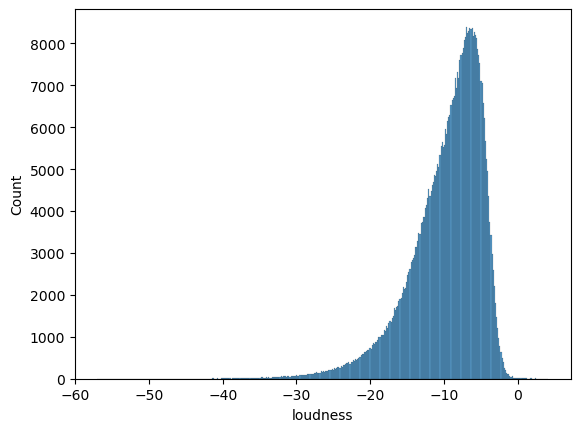

In [15]:
# plot the distribution of "loudness"
sns.histplot(df['loudness'])

In [16]:
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,-4.769,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,1399.0,585.0,210.048004,213.942398,-54.364174,0.402875,6,12,2009.0
1,-7.240,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,486.0,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,-9.843,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,591.0,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,-13.225,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,1756.0,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,-14.567,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,504.0,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,-10.029,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,2867.0,1885.0,457.410004,465.632202,-54.364174,0.655916,21,30,2001.0
999993,-8.541,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,891.0,936.0,299.433014,310.726074,-54.364174,0.603699,8,7,1999.0
999994,-15.184,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,1330.0,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,-12.935,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,434.0,266.0,112.414001,121.939140,-54.364174,0.312353,20,20,2007.0


D:\Anaconda\envs\TF2.1\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='loudness', ylabel='Count'>

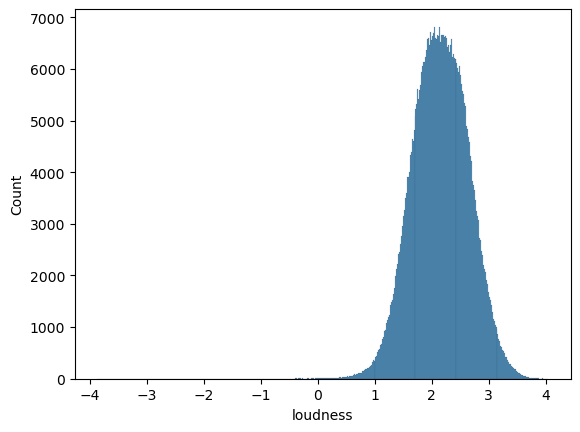

In [17]:
# take the log of "loudness" and plot the distribution
df['loudness'] = np.log(-df['loudness'])
sns.histplot(df['loudness'])

In [18]:
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,1.562137,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,1399.0,585.0,210.048004,213.942398,-54.364174,0.402875,6,12,2009.0
1,1.979621,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,486.0,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,2.286761,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,591.0,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,2.582109,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,1756.0,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,2.678759,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,504.0,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2.305481,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,2867.0,1885.0,457.410004,465.632202,-54.364174,0.655916,21,30,2001.0
999993,2.144878,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,891.0,936.0,299.433014,310.726074,-54.364174,0.603699,8,7,1999.0
999994,2.720242,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,1330.0,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,2.559937,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,434.0,266.0,112.414001,121.939140,-54.364174,0.312353,20,20,2007.0


<AxesSubplot:xlabel='tatum_num', ylabel='year'>

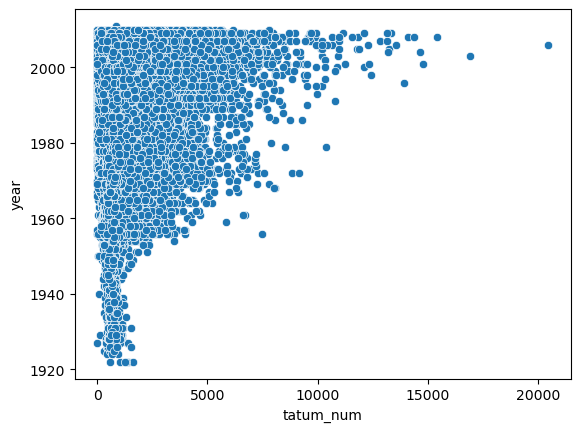

In [19]:
sns.scatterplot(x='tatum_num', y='year', data=df)

In [20]:
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,1.562137,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,1399.0,585.0,210.048004,213.942398,-54.364174,0.402875,6,12,2009.0
1,1.979621,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,486.0,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,2.286761,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,591.0,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,2.582109,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,1756.0,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,2.678759,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,504.0,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2.305481,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,2867.0,1885.0,457.410004,465.632202,-54.364174,0.655916,21,30,2001.0
999993,2.144878,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,891.0,936.0,299.433014,310.726074,-54.364174,0.603699,8,7,1999.0
999994,2.720242,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,1330.0,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,2.559937,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,434.0,266.0,112.414001,121.939140,-54.364174,0.312353,20,20,2007.0


D:\Anaconda\envs\TF2.1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='tatum_num', ylabel='year'>

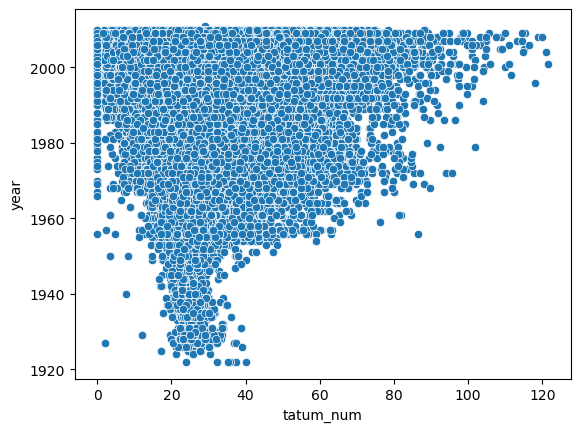

In [21]:
# take the square root of "tatum_num" and plot the relationship between the new column and "year"
df = df[df['tatum_num'] < 15000]
df['tatum_num'] = np.sqrt(df['tatum_num'])
sns.scatterplot(x='tatum_num', y='year', data=df)


In [22]:
df.dropna()
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,segment_num,start_of_fade_out,duration,artist_longitude,segments_confidence_mean,title_length,album_title_length,year
0,1.562137,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,37.403208,585.0,210.048004,213.942398,-54.364174,0.402875,6,12,2009.0
1,1.979621,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,22.045408,433.0,115.141998,118.073021,-122.420052,0.400524,32,9,2005.0
4,2.286761,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,24.310492,550.0,137.914993,148.035461,-90.048920,0.698873,9,10,1969.0
7,2.582109,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,41.904654,1364.0,386.727997,396.355469,-122.420052,0.559739,16,12,1970.0
8,2.678759,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,22.449944,467.0,153.826004,160.730988,-0.127140,0.408490,9,11,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,2.305481,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,53.544374,1885.0,457.410004,465.632202,-54.364174,0.655916,21,30,2001.0
999993,2.144878,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,29.849623,936.0,299.433014,310.726074,-54.364174,0.603699,8,7,1999.0
999994,2.720242,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,36.469165,1887.0,386.408997,390.112213,-74.123741,0.726798,35,10,1993.0
999997,2.559937,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,20.832667,266.0,112.414001,121.939140,-54.364174,0.312353,20,20,2007.0


<AxesSubplot:xlabel='artist_longitude', ylabel='artist_latitude'>

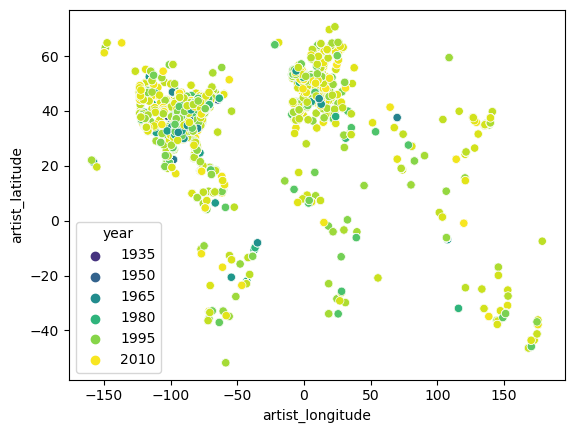

In [23]:
# plot a graph to show the relationship: artist_longitude, artist_latitude and year
# use clear, disgtinguishable colors to show the year
sns.scatterplot(x='artist_longitude', y='artist_latitude', hue='year', data=df, palette='viridis')

In [24]:
df_stored = df.copy()

In [25]:
# perform k-means algorithm according to ["artist_longitude" and "artist_latitude"]
# set the number of clusters to 6
# one-hot encode them and keep the original column
# remove the NaN values in ["artist_longitude" and "artist_latitude"]
from sklearn.preprocessing import OneHotEncoder
df = df.dropna(subset=['artist_longitude', 'artist_latitude'])
df = df.dropna(subset=['artist_longitude', 'artist_latitude'])

kmeans = KMeans(n_clusters=6, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['artist_longitude', 'artist_latitude']])

encoder = OneHotEncoder(sparse=False)

cluster_encoded_df = pd.DataFrame(cluster_encoded, columns=[f'cluster_{int(i)}' for i in range(cluster_encoded.shape[1])])
df.reset_index(drop=True, inplace=True)
cluster_encoded_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, cluster_encoded_df], axis=1)
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,...,title_length,album_title_length,year,cluster,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5
0,1.562137,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,37.403208,...,6,12,2009.0,0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.979621,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,22.045408,...,32,9,2005.0,5,0.0,0.0,0.0,0.0,0.0,1.0
2,2.286761,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,24.310492,...,9,10,1969.0,3,0.0,0.0,0.0,1.0,0.0,0.0
3,2.582109,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,41.904654,...,16,12,1970.0,5,0.0,0.0,0.0,0.0,0.0,1.0
4,2.678759,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,22.449944,...,9,11,2003.0,2,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515568,2.305481,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,53.544374,...,21,30,2001.0,0,1.0,0.0,0.0,0.0,0.0,0.0
515569,2.144878,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,29.849623,...,8,7,1999.0,0,1.0,0.0,0.0,0.0,0.0,0.0
515570,2.720242,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,36.469165,...,35,10,1993.0,3,0.0,0.0,0.0,1.0,0.0,0.0
515571,2.559937,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,20.832667,...,20,20,2007.0,0,1.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='artist_longitude', ylabel='artist_latitude'>

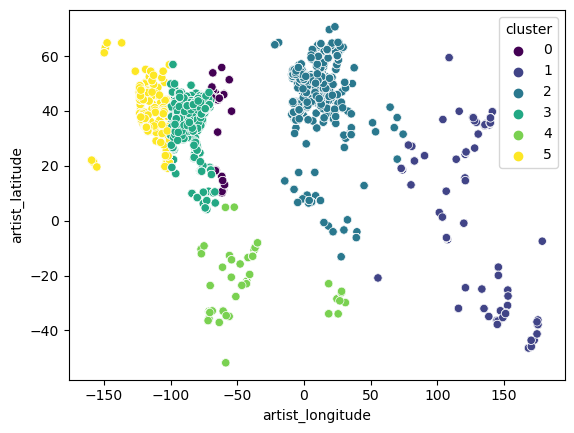

In [26]:
# plot a graph to show the relationship: artist_longitude, artist_latitude and cluster
# use clear, disgtinguishable colors to show the cluster
sns.scatterplot(x='artist_longitude', y='artist_latitude', hue='cluster', data=df, palette='viridis')

In [27]:
df = df.drop(columns=['cluster'])
df = df[[col for col in df.columns if col != 'year'] + ['year']]
df

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,...,segments_confidence_mean,title_length,album_title_length,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,year
0,1.562137,-6.529593,324573,497103,5504670,0.846,0.733372,4.0,39.927736,37.403208,...,0.402875,6,12,1.0,0.0,0.0,0.0,0.0,0.0,2009.0
1,1.979621,-8.838181,173942,226813,2496043,0.546,0.481694,4.0,37.779160,22.045408,...,0.400524,32,9,0.0,0.0,0.0,0.0,0.0,1.0,2005.0
2,2.286761,-12.450609,1998,300822,3400270,0.384,0.430713,4.0,35.149681,24.310492,...,0.698873,9,10,0.0,0.0,0.0,1.0,0.0,0.0,1969.0
3,2.582109,-16.018423,52181,244077,2978496,0.000,0.375984,1.0,37.779160,41.904654,...,0.559739,16,12,0.0,0.0,0.0,0.0,0.0,1.0,1970.0
4,2.678759,-18.145113,18514,809034,8946015,0.774,0.430713,3.0,51.506321,22.449944,...,0.408490,9,11,0.0,0.0,1.0,0.0,0.0,0.0,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515568,2.305481,-16.039965,19219,432922,4826166,0.788,0.603153,4.0,39.927736,53.544374,...,0.655916,21,30,1.0,0.0,0.0,0.0,0.0,0.0,2001.0
515569,2.144878,-12.658001,3093,386869,4295868,0.690,0.700614,4.0,39.927736,29.849623,...,0.603699,8,7,1.0,0.0,0.0,0.0,0.0,0.0,1999.0
515570,2.720242,-19.944172,4678,376738,4191547,1.000,0.647454,4.0,40.860340,36.469165,...,0.726798,35,10,0.0,0.0,0.0,1.0,0.0,0.0,1993.0
515571,2.559937,-17.435402,15326,340437,3807334,0.648,0.430713,1.0,39.927736,20.832667,...,0.312353,20,20,1.0,0.0,0.0,0.0,0.0,0.0,2007.0


In [28]:
# standardize the data except year
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['year']))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[:-1])
df_scaled['year'] = df['year']
df_scaled

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,...,segments_confidence_mean,title_length,album_title_length,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,year
0,-1.198229,1.079957,1.613224,0.586965,0.580396,0.888565,2.170816,0.319832,-0.000002,0.617270,...,-1.001152,-1.081854,-0.555773,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2009.0
1,-0.351519,0.685001,0.493864,-0.562329,-0.570144,0.079832,0.140696,0.319832,-0.226572,-1.172080,...,-1.018686,1.517767,-0.819836,-1.328795,-0.095782,-0.361805,-0.459117,-0.075484,4.068417,2005.0
2,0.271397,0.066981,-0.783877,-0.247637,-0.224355,-0.356884,-0.270532,0.319832,-0.503853,-0.908173,...,1.206482,-0.781898,-0.731815,-1.328795,-0.095782,-0.361805,2.178095,-0.075484,-0.245796,1969.0
3,0.870400,-0.543406,-0.410960,-0.488922,-0.385648,-1.392062,-0.711997,-2.175894,-0.226572,1.141738,...,0.168783,-0.082000,-0.555773,-1.328795,-0.095782,-0.361805,-0.459117,-0.075484,4.068417,1970.0
4,1.066417,-0.907243,-0.661144,1.913321,1.896413,0.694469,-0.270532,-0.512077,1.220972,-1.124947,...,-0.959272,-0.781898,-0.643794,-1.328795,-0.095782,2.763919,-0.459117,-0.075484,-0.245796,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515568,0.309364,-0.547091,-0.655905,0.314062,0.320927,0.732210,1.120427,0.319832,-0.000002,2.497891,...,0.886096,0.417927,1.028605,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2001.0
515569,-0.016358,0.031500,-0.775739,0.118241,0.118133,0.468024,1.906579,0.319832,-0.000002,-0.262804,...,0.496647,-0.881883,-0.995878,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,1999.0
515570,1.150551,-1.215028,-0.763961,0.075164,0.078240,1.303715,1.477775,0.319832,0.098342,0.508444,...,1.414758,1.817723,-0.731815,-1.328795,-0.095782,-0.361805,2.178095,-0.075484,-0.245796,1993.0
515571,0.825432,-0.785825,-0.684834,-0.079191,-0.068689,0.354801,-0.270532,-2.175894,-0.000002,-1.313377,...,-1.676289,0.317942,0.148395,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2007.0


In [29]:
# perform correlation analysis, find which column is related to "year", show in descending order
df_scaled.corr()['year'].sort_values(ascending=False)

year                          1.000000
segments_loudness_max_mean    0.235501
artist_7digitalid             0.205401
cluster_0                     0.131246
release_7digitalid            0.111313
track_7digitalid              0.109127
time_signature_confidence     0.108923
song_hotness                  0.095344
time_signature                0.085417
tatum_num                     0.074717
segment_num                   0.063963
artist_longitude              0.052528
start_of_fade_out             0.052455
duration                      0.052278
cluster_1                     0.015462
artist_latitude               0.014832
cluster_4                    -0.015661
cluster_5                    -0.017800
cluster_2                    -0.027855
title_length                 -0.046961
segments_confidence_mean     -0.082853
album_title_length           -0.113036
cluster_3                    -0.132685
loudness                     -0.305389
Name: year, dtype: float64

In [30]:
df_scaled

,loudness,segments_loudness_max_mean,artist_7digitalid,release_7digitalid,track_7digitalid,time_signature_confidence,song_hotness,time_signature,artist_latitude,tatum_num,...,segments_confidence_mean,title_length,album_title_length,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,year
0,-1.198229,1.079957,1.613224,0.586965,0.580396,0.888565,2.170816,0.319832,-0.000002,0.617270,...,-1.001152,-1.081854,-0.555773,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2009.0
1,-0.351519,0.685001,0.493864,-0.562329,-0.570144,0.079832,0.140696,0.319832,-0.226572,-1.172080,...,-1.018686,1.517767,-0.819836,-1.328795,-0.095782,-0.361805,-0.459117,-0.075484,4.068417,2005.0
2,0.271397,0.066981,-0.783877,-0.247637,-0.224355,-0.356884,-0.270532,0.319832,-0.503853,-0.908173,...,1.206482,-0.781898,-0.731815,-1.328795,-0.095782,-0.361805,2.178095,-0.075484,-0.245796,1969.0
3,0.870400,-0.543406,-0.410960,-0.488922,-0.385648,-1.392062,-0.711997,-2.175894,-0.226572,1.141738,...,0.168783,-0.082000,-0.555773,-1.328795,-0.095782,-0.361805,-0.459117,-0.075484,4.068417,1970.0
4,1.066417,-0.907243,-0.661144,1.913321,1.896413,0.694469,-0.270532,-0.512077,1.220972,-1.124947,...,-0.959272,-0.781898,-0.643794,-1.328795,-0.095782,2.763919,-0.459117,-0.075484,-0.245796,2003.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515568,0.309364,-0.547091,-0.655905,0.314062,0.320927,0.732210,1.120427,0.319832,-0.000002,2.497891,...,0.886096,0.417927,1.028605,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2001.0
515569,-0.016358,0.031500,-0.775739,0.118241,0.118133,0.468024,1.906579,0.319832,-0.000002,-0.262804,...,0.496647,-0.881883,-0.995878,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,1999.0
515570,1.150551,-1.215028,-0.763961,0.075164,0.078240,1.303715,1.477775,0.319832,0.098342,0.508444,...,1.414758,1.817723,-0.731815,-1.328795,-0.095782,-0.361805,2.178095,-0.075484,-0.245796,1993.0
515571,0.825432,-0.785825,-0.684834,-0.079191,-0.068689,0.354801,-0.270532,-2.175894,-0.000002,-1.313377,...,-1.676289,0.317942,0.148395,0.752561,-0.095782,-0.361805,-0.459117,-0.075484,-0.245796,2007.0


In [ ]:
# save it as a csv file
df_scaled.to_csv('songs_advanced.csv', index=False)